In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Часть 1: аналитическое решение

Мы хотим найти зависимость между $x$ и $y$ в виде полинома степени $p$:

$$
y_i = a_0 + a_1x_i + a_2x_i^2 + \dots, + a_nx_i^n + \varepsilon_i
$$

Где:

- $y_i$ - наблюдаемое значение в точке $i$

- $x_i$ - независимая переменная

- $a_0, a_1, a_2,\, \dots, a_n$ - неизвестные коэффициенты, которые нам нужно найти

- $\varepsilon_i$ - ошибка (шум), которая нам неизвестна - мы предполагаем ее нормальное распределение: $\varepsilon \approx N(0, \sigma^2)$

У нас есть 12 наблюдений пар $(x_i, y_i)$:

| №  |     x_i |     y_i |
|----|--------:|--------:|
| 1  |  -0.502 |  -0.900 |
| 2  |   1.803 |   3.124 |
| 3  |   0.928 |   0.455 |
| 4  |   0.395 |  -0.342 |
| 5  |  -1.376 |   0.158 |
| 6  |  -1.376 |   0.159 |
| 7  |  -1.768 |   1.557 |
| 8  |   1.465 |   2.031 |
| 9  |   0.404 |  -0.728 |
| 10 |   0.832 |   0.217 |
| 11 |  -1.918 |   1.626 |
| 12 |   1.880 |   3.380 |

Основные суммы для вычислений (если решать на бумаге):

$$
\sum_{i=1}^{12}x_i, \sum_{i=1}^{12}y_i, \sum_{i=1}^{12}x_i^2, \sum_{i=1}^{12}x_iy_i, \sum_{i=1}^{12}x_i^3, \sum_{i=1}^{12}x_i^4, \sum_{i=1}^{12}x_i^2y_i
$$

Основная идея аналитического решения - МНК.

Этот метод подбирает коэффициенты $\hat{a}$ так, чтобы минимизировать сумму квадратов остатков:

$$
\min_{a} \sum_{i=1}^{n} \varepsilon^2 = \min_a \sum_{i=1}^{n} (y_i - \hat{y_i})^2
$$

Введем дизайн-матрицу $X$ с размерами n $\times$ (p + 1) и вектор ответов $y$ с размером n $\times$ 1:

$$
X =
\begin{pmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^p \\
1 & x_2 & x_2^2 & \cdots & x_2^p \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \cdots & x_n^p
\end{pmatrix}, \qquad
y =
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{pmatrix}
$$

Модель в матричной форме:

$$
y = Xa + \varepsilon
$$

Оценка коэффициентов МНК:

$$
\hat{a} = (X^\top X)^{-1} X^\top y
$$

Далее введем решения для степеней 0, 1, 2 и перейдем к коду.

1. Уравнения для степеней 0, 1, 2:

$$
\hat{y_0} = a_0 + \varepsilon_i, \qquad
\hat{y_1} = a_0 + a_1x_i + \varepsilon_i, \qquad
\hat{y_2} = a_0 + a_1x_i + a_2x_i^2 + \varepsilon_i
$$

После того, как записали уравнения в общем виде, следующим шагом вводим дизайн-матрицу $X$, которая для всех трех уравнений будет разной.

2. Дизайн-матрицы для уравнений степеней 0, 1, 2:

$$
X_0 =
\begin{pmatrix}
1 \\
1 \\
1 \\
1 \\
1 \\
1 \\
1 \\
1 \\
1 \\
1 \\
1 \\
1
\end{pmatrix}, \qquad
X_1 =
\begin{pmatrix}
1 & x_1 \\
1 & x_2 \\
1 & x_3 \\
1 & x_4 \\
1 & x_5 \\
1 & x_6 \\
1 & x_7 \\
1 & x_8 \\
1 & x_9 \\
1 & x_{10} \\
1 & x_{11} \\
1 & x_{12}
\end{pmatrix}, \qquad
X_2 =
\begin{pmatrix}
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
1 & x_3 & x_3^2 \\
1 & x_4 & x_4^2 \\
1 & x_5 & x_5^2 \\
1 & x_6 & x_6^2 \\
1 & x_7 & x_7^2 \\
1 & x_8 & x_8^2 \\
1 & x_9 & x_9^2 \\
1 & x_{10} & x_{10}^2 \\
1 & x_{11} & x_{11}^2 \\
1 & x_{12} & x_{12}^2
\end{pmatrix}
$$

3. Далее для каждого из порядков решаем уравнение вида $\hat{a} = (X^\top X)^{-1} X^\top y$ - тем самым находим оценку истинного параметра.

4. Подставляем вектор из $\hat{a}$ в свое уравнение регрессии для каждого из порядков из шага 1, находя тем самым предсказанные значения $\hat{y}$.

5. Для каждого наблюдения в точке $i$ считаем ошибку как $\varepsilon_i = y - \hat{y_i}$.

6. Находим сумму квадратов остатков как $$\sum_{i=1}^{12}SSE = \sum_{i=1}^{12}\varepsilon_i^2$$

7. Находим полную сумму квадратов как

$$
\sum_{i=1}^{12}SST = \sum_{i=1}^{12}(y - \bar{y})^2
, \qquad где \, \bar{y} - среднее.
$$

8. И финальным шагом находим коэффициент детерминации $R^2$, показывающий долю дисперсии, объясненный нашей моделью, как

$$
R^2 = 1 - \frac{SSE}{SST}
$$

После аналитического решения, которое даёт нам несмещенные оценки, мы должны проверить остатки на нормальность.

Это нужно для того, чтобы быть уверенными в корректности статистического вывода.

В частности, если предположение о нормальности выполняется, мы можем построить 95%-й доверительный интервал для истинного параметра $a$ и быть уверенными, что метод построения такого интервала в 95% случаев накрывает неизвестное истинное значение параметра.

In [2]:
# Данные
x = np.array([-0.502, 1.803, 0.928, 0.395, -1.376, -1.376, -1.768, 1.465, 0.404, 0.832, -1.918, 1.880])
y = np.array([-0.900, 3.124, 0.455, -0.342, 0.158, 0.159, 1.557, 2.031, -0.728, 0.217, 1.626, 3.380])

# Общая SST - так как зависит только от y
SST = np.sum((y - np.mean(y))**2)
print(f"Общая SST = {SST:.4f}\n")

# Порядок 0
X0 = np.ones((len(x), 1))
a0 = np.linalg.inv(X0.T @ X0) @ X0.T @ y
SSE0 = np.sum((y - X0 @ a0)**2)
R20 = 1 - SSE0/SST
print(f"Порядок 0: a_hat = {a0[0]:.4f}, SSE = {SSE0:.4f}, R² = {R20:.4f}")

# Порядок 1
X1 = np.column_stack((np.ones_like(x), x))
a1 = np.linalg.inv(X1.T @ X1) @ X1.T @ y
SSE1 = np.sum((y - X1 @ a1)**2)
R21 = 1 - SSE1/SST
print(f"Порядок 1: a_hat = {a1}, SSE = {SSE1:.4f}, R² = {R21:.4f}")

# Порядок 2
X2 = np.column_stack((np.ones_like(x), x, x**2))
a2 = np.linalg.inv(X2.T @ X2) @ X2.T @ y
SSE2 = np.sum((y - X2 @ a2)**2)
R22 = 1 - SSE2/SST
print(f"Порядок 2: a_hat = {a2}, SSE = {SSE2:.4f}, R² = {R22:.4f}")

y_hat = X2 @ a2
residuals = y - y_hat

Общая SST = 22.5312

Порядок 0: a_hat = 0.8947, SSE = 22.5312, R² = -0.0000
Порядок 1: a_hat = [0.86931794 0.39789403], SSE = 19.1118, R² = 0.1518
Порядок 2: a_hat = [-0.88089678  0.49414192  0.96680281], SSE = 0.2213, R² = 0.9902


In [3]:
# Тест Шапиро-Уилка
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"Тест Шапиро-Уилка: W={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("Нет оснований отвергать гипотезу о нормальности (p > 0.05)")
else:
    print("Отвергаем гипотезу о нормальности (p ≤ 0.05)")

Тест Шапиро-Уилка: W=0.9453, p-value=0.5699
Нет оснований отвергать гипотезу о нормальности (p > 0.05)


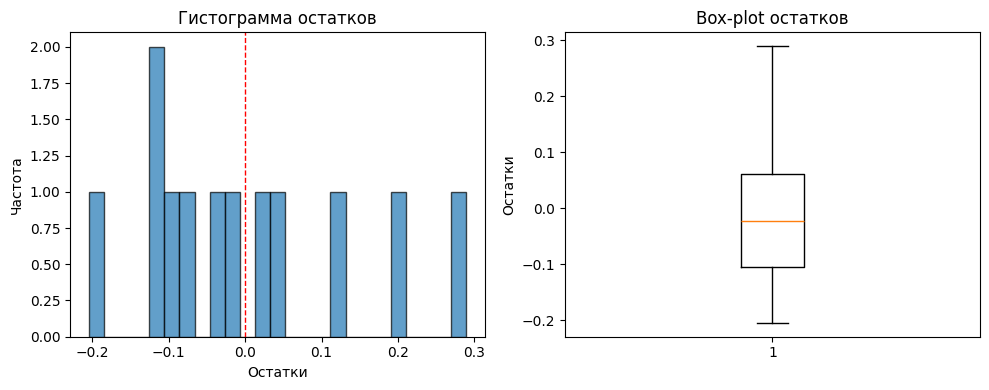

Мин: -0.205
Макс: 0.289
Среднее: 0.000
Std: 0.136


In [4]:
# Графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Гистограмма
ax1.hist(residuals, bins=25, edgecolor='black', alpha=0.7)
ax1.axvline(0, color='red', linestyle='--', linewidth=1)
ax1.set_xlabel('Остатки')
ax1.set_ylabel('Частота')
ax1.set_title('Гистограмма остатков')

# Box-plot
ax2.boxplot(residuals)
ax2.set_ylabel('Остатки')
ax2.set_title('Box-plot остатков')

plt.tight_layout()
plt.show()

# Статистика
print(f"Мин: {np.min(residuals):.3f}")
print(f"Макс: {np.max(residuals):.3f}")
print(f"Среднее: {np.mean(residuals):.3f}")
print(f"Std: {np.std(residuals):.3f}")

In [5]:
# Симуляция: что если мы возьмем новые данные из той же генеральной совокупности?
# Создаем "новые" данные на основе старой модели с шумом
np.random.seed(42)
x_new = np.random.uniform(x.min(), x.max(), size=12)
# Истинная модель (которую мы не знаем): y = 0.4 + 0.5*x + 0.1*x^2 + шум
y_new = 0.4 + 0.5*x_new + 0.1*x_new**2 + np.random.normal(0, 0.5, size=12)

# Применяем нашу "идеальную" модель к новым данным
X_new = np.column_stack((np.ones_like(x_new), x_new, x_new**2))
y_pred_new = X_new @ a2  # Используем параметры a2, полученные на старых данных
residuals_new = y_new - y_pred_new

print(f"R² на новых данных: {1 - np.sum(residuals_new**2)/np.sum((y_new - np.mean(y_new))**2):.4f}")
print(f"MSE на новых данных: {np.mean(residuals_new**2):.4f}")
print(f"Остатки: среднее={np.mean(residuals_new):.3f}, std={np.std(residuals_new):.3f}")

R² на новых данных: -1.2778
MSE на новых данных: 1.5901
Остатки: среднее=-0.453, std=1.177


## Итоги аналитического решения

Мы получили $R^2 = 99\%$ при модели квадратичной регрессии.

Это значит, что наша модель 2 порядка идеально подходит под эту выборку из 12 пар значений.

Мы проверили нормальность остатков - это значит, что можем построить 95%-й доверительный интервал для истинного параметра $a$ и быть уверенными, что метод построения такого интервала в 95% случаев накрывает неизвестное истинное значение параметра в генеральной совокупности (в дальнейшем это теряет смысл, так как наша модель переобучена - у нас мало данных, и ДИ слишком узкие).

При этом, построив гистограмму распределения остатков, мы заметили любопытную вещь - все остатки близки к 0.

В реальности это означает переобучение - наша модель идеально работает на этой выборке, однако "сломается" на новых данных.

Пример из симуляции это наглядно демонстрирует - мы получили отрицательный $R^2$ - на новых данных наша модель хуже, чем простое среднее!

Ключевой вывод: аналитическое решение МНК дает хорошее решение под одну конкретную выборку, но не обобщает закономерности на новых данных.

Поэтому во второй части этого ноутбука вместо аналитического решения нормальных уравнений $(X^\top X)^{-1} X^\top y$, мы будем:

1. Представлять регрессию как "нейрон": $y = \sigma(wx + b)$ (где $\sigma$ - линейная функция)
2. Использовать градиентный спуск для минимизации MSE
3. Добавим регуляризацию для борьбы с переобучением

## Часть 2: оптимизационное решение

Если в первой части мы искали $\hat{a}$ аналитически, решая уравнение, во второй части мы будем находить $\hat{a}$ итерационно.

Наше уравнение немного меняется - если раньше мы искали $\hat{y_i} = Xa + \varepsilon_i$, то сейчас мы будем находить $y$ так:

$$
\hat{y_i} = wx_i + b
$$

Где $w$ - "вес" для каждого признака (аналог $a_1, a_2$), а $b$ - свободный член, или intercept (аналог $a_0$).

Напишем решение в теории, а затем перейдем к коду.

1. Инициализируем $w$ и $b$ случайными начальными значениями.

2. Находим $\hat{y_i}$ - считаем тем самым предсказания для всех $x_i$.

3. Считаем ошибку - сравниваем, насколько предсказания отличились от реальных $y$.

Ошибка - сумма квадратов остатков (SSE), деленная на количество наблюдений - чтобы не зависеть от размера выборки

$$
L(w, b) = \frac{1}{12} \sum_{i=1}^{12} (y_i - (wx_i + b))^2
$$

Такая ошибка называется среднеквадратичная ошибка, или $MSE$.

4. Находим градиент.

Градиент - это вектор, который показывает направление наискорейшего роста функции.

Наша функция - это лосс $L(w, b)$, и нам нужно идти в противоположном направлении, чтобы этот лосс был маленьким.

Мы считаем частную производную по $w$, а затем частную производную по $b$ - тем самым получая вектор, образующий градиент.

Математически:

$$
\nabla L(w, b) =
\begin{pmatrix}
\frac{\partial L}{\partial w} \\
\frac{\partial L}{\partial b}
\end{pmatrix}
$$

Где $\frac{\partial L}{\partial w}$ и $\frac{\partial L}{\partial b}$ - скаляры, которые показывают, как меняется функция $L$ при малом изменении $w$ (при неизменном $b$) и как меняется функция $L$ при малом изменении $b$ (при неизменном $w$) соответственно.

$$
\frac{\partial L}{\partial w} =
-\frac{2}{12} \sum_{i=1}^{12} x_i (y_i - \hat{y_i}) =
-\frac{2}{12} \sum_{i=1}^{12} x_i (y_i - (wx_i + b))
$$

Разберем то, как эта формула появляется.

У нас есть лосс (MSE):

$$
L(w, b) = \frac{1}{12} \left[
(y_1 - (wx_1 + b))^2 + (y_2 - (wx_2 + b))^2 + \dots + \ (y_{12} - (wx_{12} + b))^2
\right]
$$

Берем производную по $w$ от каждого слагаемого:

$$
\frac{\partial L}{\partial w} = \frac{1}{12} \left[
\frac{\partial}{\partial w}(y_1 - (wx_1 + b))^2 +
\frac{\partial}{\partial w}(y_2 - (wx_2 + b))^2 + \dots +
\frac{\partial}{\partial w}(y_{12} - (wx_{12} + b))^2
\right]
$$

К каждому слагаемому применяем цепное правило (сложная функция):

Пусть $(y_i - (wx_i + b)) = u_i$, тогда

$$
(y_i - (wx_i + b))^2 = u_i^2, \qquad \frac{\partial}{\partial w}(u_i^2) = 2u_i \cdot \frac{\partial u_i}{\partial w}
$$

Найдем производную внутренней функции $\frac{\partial u_i}{\partial w}$:

$$
\frac{\partial}{\partial w} = (y_i - (wx_i + b)) = y_i - wx_i - b
$$

Дифференцируем по $w$:

$$
\frac{\partial u_i}{\partial w} = \frac{\partial}{\partial w}(y_i - wx_i - b) = 0 - x_i - 0 = -x_i
$$

Подставляем обратно:

$$
\frac{\partial}{\partial w}(y_i - (wx_i + b))^2 = 2u_i \cdot (-x_i) = -2 x_i u_i = -2 x_i (y_i - (wx_i + b))
$$

Собираем все слагаемые и выносим константы за знак суммы:

$$
\frac{\partial L}{\partial w} = \frac{1}{12} \sum_{i=1}^{12} \bigl( -2 x_i (y_i - (wx_i + b)) \bigr) = -\frac{2}{12} \sum_{i=1}^{12} \bigl( x_i (y_i - (wx_i + b)) \bigr)
$$

Аналогично для $\frac{\partial L}{\partial b}$:

$$
\frac{\partial L}{\partial b} = -\frac{2}{12} \sum_{i=1}^{12} \bigl(y_i - (w x_i + b)\bigr)
$$

Мы нашли градиент:

$$
\nabla L(w, b) =
\begin{pmatrix}
\displaystyle -\frac{2}{12} \sum_{i=1}^{12} x_i \bigl(y_i - (w x_i + b)\bigr) \\[2em]
\displaystyle -\frac{2}{12} \sum_{i=1}^{12} \bigl(y_i - (w x_i + b)\bigr)
\end{pmatrix}
$$

5. Обновляем наши параметры $w$ и $b$ до $w_{new}$ и $b_{new}$, используя найденный градиент:

$$
w_{new} = w_{old} - \alpha \cdot \frac{\partial L}{\partial w}, \qquad b_{new} = b_{old} - \alpha \cdot \frac{\partial L}{\partial b}
$$

Где $\alpha$ - скорость (шаг) обучения, а знак минус мы используем, чтобы "идти" против роста функции нашего лосса.

6. Повторяем шаги 2-5 много раз - пока ошибка не перестанет уменьшаться.

При этом используем один из критериев остановки:

- определенное количество эпох;

- когда изменение ошибки меньше порога $| L_{new} - L_{old} | < \varepsilon$

ГРАДИЕНТНЫЙ СПУСК ДЛЯ РАЗНЫХ СТЕПЕНЕЙ

--- Степень 0 (константа) ---
Степень 0: сошлось на эпохе 40
Параметр b = 0.894655
Финальная MSE = 1.877603
Аналитическое решение (среднее y) = 0.894750

--- Степень 1 (линейная) ---
Степень 1: сошлось на эпохе 371
Параметры: w = 0.397931, b = 0.868842
Финальная MSE = 1.592650

--- Степень 2 (квадратичная) ---
Степень 2: сошлось на эпохе 16971
Параметры: w1 = 0.493729, w2 = 0.964081, b = -0.873880
Финальная MSE = 0.018461


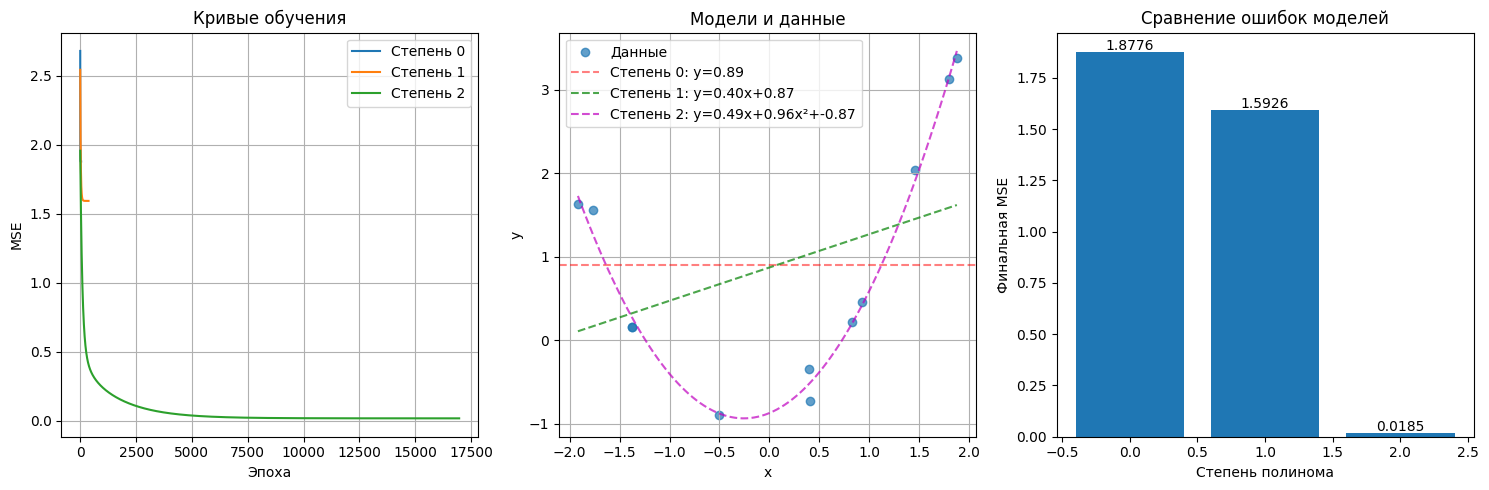


СРАВНЕНИЕ С АНАЛИТИЧЕСКИМ РЕШЕНИЕМ (МНК)

Степень 1 (аналитически): w = 0.397894, b = 0.869318
Степень 1 (градиентный):  w = 0.397931, b = 0.868842
Разница: Δw = 0.000037, Δb = 0.000476

Степень 2 (аналитически): w1 = 0.494142, w2 = 0.966803, b = -0.880897
Степень 2 (градиентный):  w1 = 0.493729, w2 = 0.964081, b = -0.873880
Разница: Δw1 = 0.000413, Δw2 = 0.002722, Δb = 0.007017

MSE степень 1 (аналитически): 1.592649
MSE степень 1 (градиентный):  1.592650
Разница MSE: 0.000000


In [6]:
# ------------------------------------------------------------
# 1. Степень 0 (константа): y = b
# ------------------------------------------------------------
def gradient_descent_degree0(x, y, alpha=0.1, epochs=1000, tol=1e-8):
    """Градиентный спуск для модели y = b (только intercept)"""
    n = len(y)
    b = 0.0  # инициализация
    losses = []

    for epoch in range(epochs):
        # Предсказания (все равны b)
        y_pred = np.full_like(y, b)

        # MSE
        loss = np.mean((y - y_pred)**2)
        losses.append(loss)

        # Градиент: db = -2/n * sum(y_i - b)
        db = -2/n * np.sum(y - y_pred)

        # Обновление параметра
        b = b - alpha * db

        # Проверка сходимости
        if epoch > 0 and abs(losses[-1] - losses[-2]) < tol:
            print(f"Степень 0: сошлось на эпохе {epoch}")
            break

    return b, losses

# ------------------------------------------------------------
# 2. Степень 1 (линейная): y = w*x + b
# ------------------------------------------------------------
def gradient_descent_degree1(x, y, alpha=0.01, epochs=1000, tol=1e-8):
    """Градиентный спуск для линейной модели"""
    n = len(y)
    w, b = 0.1, 0.0  # инициализация
    losses = []

    for epoch in range(epochs):
        # Предсказания
        y_pred = w * x + b

        # MSE
        loss = np.mean((y - y_pred)**2)
        losses.append(loss)

        # Градиенты
        dw = -2/n * np.sum(x * (y - y_pred))
        db = -2/n * np.sum(y - y_pred)

        # Обновление параметров
        w = w - alpha * dw
        b = b - alpha * db

        # Проверка сходимости
        if epoch > 0 and abs(losses[-1] - losses[-2]) < tol:
            print(f"Степень 1: сошлось на эпохе {epoch}")
            break

    return w, b, losses

# ------------------------------------------------------------
# 3. Степень 2 (квадратичная): y = w1*x + w2*x^2 + b
# ------------------------------------------------------------
def gradient_descent_degree2(x, y, alpha=0.0005, epochs=20000, tol=1e-8):
    """Градиентный спуск для квадратичной модели"""
    n = len(y)
    w1, w2, b = 0.1, 0.1, 0.0  # инициализация
    losses = []

    for epoch in range(epochs):
        # Предсказания
        y_pred = w1 * x + w2 * (x**2) + b

        # MSE
        loss = np.mean((y - y_pred)**2)
        losses.append(loss)

        # Градиенты
        dw1 = -2/n * np.sum(x * (y - y_pred))
        dw2 = -2/n * np.sum((x**2) * (y - y_pred))
        db  = -2/n * np.sum(y - y_pred)

        # Обновление параметров
        w1 = w1 - alpha * dw1
        w2 = w2 - alpha * dw2
        b = b - alpha * db

        # Проверка сходимости
        if epoch > 0 and abs(losses[-1] - losses[-2]) < tol:
            print(f"Степень 2: сошлось на эпохе {epoch}")
            break

    return w1, w2, b, losses

# ------------------------------------------------------------
# ЗАПУСК И ВЫВОД РЕЗУЛЬТАТОВ
# ------------------------------------------------------------
print("=" * 50)
print("ГРАДИЕНТНЫЙ СПУСК ДЛЯ РАЗНЫХ СТЕПЕНЕЙ")
print("=" * 50)

# 1. Степень 0
print("\n--- Степень 0 (константа) ---")
b0, losses0 = gradient_descent_degree0(x, y)
print(f"Параметр b = {b0:.6f}")
print(f"Финальная MSE = {losses0[-1]:.6f}")
print(f"Аналитическое решение (среднее y) = {np.mean(y):.6f}")

# 2. Степень 1
print("\n--- Степень 1 (линейная) ---")
w1, b1, losses1 = gradient_descent_degree1(x, y)
print(f"Параметры: w = {w1:.6f}, b = {b1:.6f}")
print(f"Финальная MSE = {losses1[-1]:.6f}")

# 3. Степень 2
print("\n--- Степень 2 (квадратичная) ---")
w1_2, w2_2, b2, losses2 = gradient_descent_degree2(x, y)
print(f"Параметры: w1 = {w1_2:.6f}, w2 = {w2_2:.6f}, b = {b2:.6f}")
print(f"Финальная MSE = {losses2[-1]:.6f}")

# ------------------------------------------------------------
# ВИЗУАЛИЗАЦИЯ КРИВЫХ ОБУЧЕНИЯ
# ------------------------------------------------------------
plt.figure(figsize=(15, 5))

# График 1: Кривые обучения
plt.subplot(1, 3, 1)
plt.plot(losses0, label='Степень 0')
plt.plot(losses1, label='Степень 1')
plt.plot(losses2, label='Степень 2')
plt.xlabel('Эпоха')
plt.ylabel('MSE')
plt.title('Кривые обучения')
plt.legend()
plt.grid(True)

# График 2: Данные и модели
plt.subplot(1, 3, 2)
# Сортируем для красивого отображения
sorted_idx = np.argsort(x)
x_sorted = x[sorted_idx]
y_sorted = y[sorted_idx]

plt.scatter(x, y, alpha=0.7, label='Данные')

# Предсказания моделей
x_range = np.linspace(x.min(), x.max(), 100)
# Степень 0
plt.axhline(y=b0, color='r', linestyle='--', alpha=0.5, label=f'Степень 0: y={b0:.2f}')
# Степень 1
y_pred_1 = w1 * x_range + b1
plt.plot(x_range, y_pred_1, 'g--', alpha=0.7, label=f'Степень 1: y={w1:.2f}x+{b1:.2f}')
# Степень 2
y_pred_2 = w1_2 * x_range + w2_2 * (x_range**2) + b2
plt.plot(x_range, y_pred_2, 'm--', alpha=0.7, label=f'Степень 2: y={w1_2:.2f}x+{w2_2:.2f}x²+{b2:.2f}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Модели и данные')
plt.legend()
plt.grid(True)

# График 3: Сравнение MSE
plt.subplot(1, 3, 3)
degrees = [0, 1, 2]
mse_values = [losses0[-1], losses1[-1], losses2[-1]]
plt.bar(degrees, mse_values)
plt.xlabel('Степень полинома')
plt.ylabel('Финальная MSE')
plt.title('Сравнение ошибок моделей')
for i, v in enumerate(mse_values):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')

plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# СРАВНЕНИЕ С АНАЛИТИЧЕСКИМ РЕШЕНИЕМ
# ------------------------------------------------------------
print("\n" + "=" * 50)
print("СРАВНЕНИЕ С АНАЛИТИЧЕСКИМ РЕШЕНИЕМ (МНК)")
print("=" * 50)

# Аналитическое решение для степени 1
X1 = np.column_stack([np.ones_like(x), x])  # [1, x]
theta1 = np.linalg.inv(X1.T @ X1) @ X1.T @ y
w_analytical_1, b_analytical_1 = theta1[1], theta1[0]
print(f"\nСтепень 1 (аналитически): w = {w_analytical_1:.6f}, b = {b_analytical_1:.6f}")
print(f"Степень 1 (градиентный):  w = {w1:.6f}, b = {b1:.6f}")
print(f"Разница: Δw = {abs(w1 - w_analytical_1):.6f}, Δb = {abs(b1 - b_analytical_1):.6f}")

# Аналитическое решение для степени 2
X2 = np.column_stack([np.ones_like(x), x, x**2])  # [1, x, x^2]
theta2 = np.linalg.inv(X2.T @ X2) @ X2.T @ y
b_analytical_2, w1_analytical_2, w2_analytical_2 = theta2[0], theta2[1], theta2[2]
print(f"\nСтепень 2 (аналитически): w1 = {w1_analytical_2:.6f}, w2 = {w2_analytical_2:.6f}, b = {b_analytical_2:.6f}")
print(f"Степень 2 (градиентный):  w1 = {w1_2:.6f}, w2 = {w2_2:.6f}, b = {b2:.6f}")
print(f"Разница: Δw1 = {abs(w1_2 - w1_analytical_2):.6f}, Δw2 = {abs(w2_2 - w2_analytical_2):.6f}, Δb = {abs(b2 - b_analytical_2):.6f}")

# Проверка MSE
y_pred_analytical_1 = w_analytical_1 * x + b_analytical_1
mse_analytical_1 = np.mean((y - y_pred_analytical_1)**2)
print(f"\nMSE степень 1 (аналитически): {mse_analytical_1:.6f}")
print(f"MSE степень 1 (градиентный):  {losses1[-1]:.6f}")
print(f"Разница MSE: {abs(losses1[-1] - mse_analytical_1):.6f}")

Важная особенность, которую мы скоро увидим - точность растет только на обучающих данных, на тестовой выборке результат будет хуже (переобучение).

Поэтому в итерационном способе решения мы будем использовать полином высокой степени - например, 5, чтобы добиться очень низкую ошибку $MSE$ на обучающей выборке, и одновременно оштрафовать модель за слишком большие веса, внедрив регуляризацию - тем самым мы сознательно ухудшим точность предсказания на обучающей выборке и значительно улучшим ее на тестовой:

В скалярной записи (понятнее для вывода формул):

$$
L_{\text{reg}}(\mathbf{w}, b) =
\frac{1}{12} \sum_{i=1}^{12} \Bigl(y_i - \bigl(b + \sum_{j=1}^{5} w_j x_i^j\bigr)\Bigr)^2 + \lambda \sum_{j=1}^{5} w_j^2
$$

В матричной записи (компактнее для программирования):

$$
L_{\text{reg}}(\mathbf{w}, b) =
\frac{1}{12} \|\mathbf{y} - (\mathbf{X}\mathbf{w} + b\mathbf{1})\|^2 + \lambda \|\mathbf{w}\|^2
$$

где:

- $\mathbf{X} =
\begin{pmatrix}
x_1^1 & x_1^2 & \cdots & x_1^5 \\
x_2^1 & x_2^2 & \cdots & x_2^5 \\
\vdots & \vdots & \ddots & \vdots \\
x_{12}^1 & x_{12}^2 & \cdots & x_{12}^5
\end{pmatrix}$ — матрица признаков

- $\mathbf{w} =
\begin{pmatrix}
w_1 \\ w_2 \\ \vdots \\ w_5
\end{pmatrix}$ — вектор весов

- $\mathbf{y} =
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_{12}
\end{pmatrix}$ — вектор целевых значений

- $\mathbf{1} =
\begin{pmatrix}
1 \\ 1 \\ \vdots \\ 1
\end{pmatrix}$ — вектор из единиц

- $\lambda \geq 0$ — коэффициент регуляризации

Полином степени 5
Обучающих точек: 8
Тестовых точек: 4
Параметров: 5 весов + 1 intercept

ЭКСПЕРИМЕНТ 1: Без регуляризации (λ=0)
Train MSE: 0.061440
Test MSE:  0.872934
Переобучение (Test - Train): 0.811494
Норма весов: 0.6205

ЭКСПЕРИМЕНТ 2: С регуляризацией (λ=0.1)
Train MSE: 0.060482
Test MSE:  0.739371
Переобучение (Test - Train): 0.678889
Норма весов: 0.4978

ИТОГИ:
Улучшение Test MSE: 15.3%
Уменьшение нормы весов: 1.25 раз

Веса (первые 3):
λ=0:    w1=0.0251, w2=-0.3054, w3=0.4348
λ=0.1:  w1=0.0580, w2=-0.2003, w3=0.3550


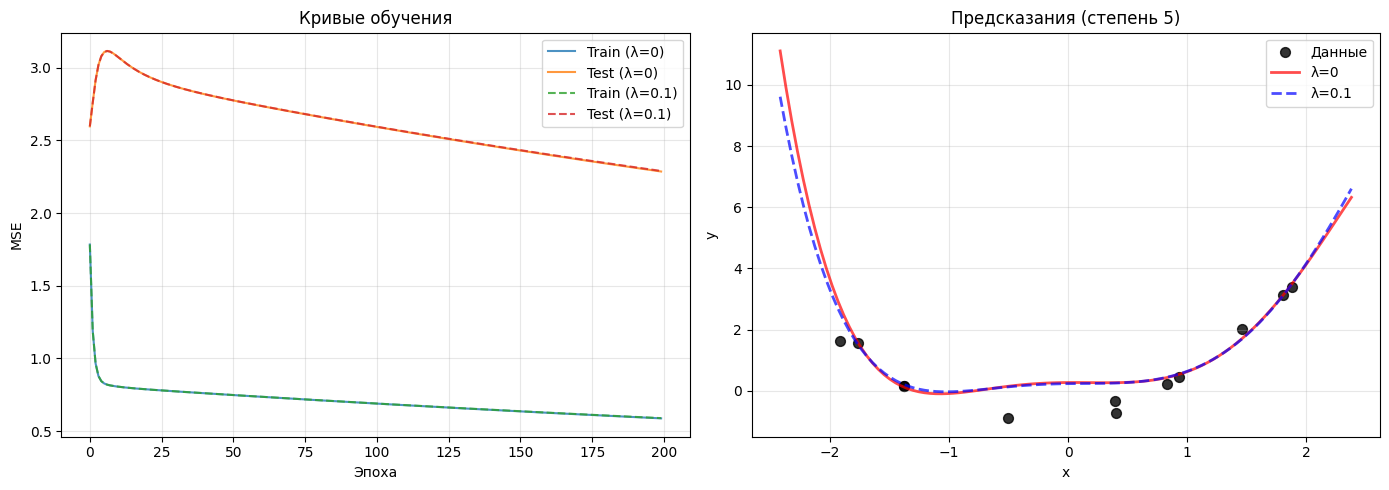


ПОДБОР ОПТИМАЛЬНОГО λ (опционально)
λ | Train MSE | Test MSE | ||w||
----------------------------------------
0.00 | 0.061440 | 0.872934 | 0.6205
0.01 | 0.061059 | 0.856162 | 0.6055
0.05 | 0.060263 | 0.797450 | 0.5522
0.10 | 0.060482 | 0.739371 | 0.4978
0.50 | 0.076517 | 0.550359 | 0.3077
1.00 | 0.097126 | 0.509939 | 0.2461


In [7]:
# ============================================================================
# 1. ДАННЫЕ
# ============================================================================
x = np.array([-0.502, 1.803, 0.928, 0.395, -1.376, -1.376,
              -1.768, 1.465, 0.404, 0.832, -1.918, 1.880])
y = np.array([-0.900, 3.124, 0.455, -0.342, 0.158, 0.159,
              1.557, 2.031, -0.728, 0.217, 1.626, 3.380])

# ============================================================================
# 2. ПОДГОТОВКА ПРИЗНАКОВ (СТЕПЕНЬ 5)
# ============================================================================
degree = 5
print(f"Полином степени {degree}")

# Создаём признаки
X_poly = np.column_stack([x**d for d in range(1, degree + 1)])

# Разделяем на train/test (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.3, random_state=42
)

print(f"Обучающих точек: {X_train.shape[0]}")
print(f"Тестовых точек: {X_test.shape[0]}")
print(f"Параметров: {degree} весов + 1 intercept")

# ============================================================================
# 3. ГРАДИЕНТНЫЙ СПУСК ДЛЯ СТЕПЕНИ 5
# ============================================================================
def grad_descent_degree5(X_train, y_train, X_test, y_test, lambda_=0.0):
    n = len(y_train)
    n_features = X_train.shape[1]

    # Инициализация
    w = np.zeros(n_features)  # начинаем с нулей
    b = np.mean(y_train)
    alpha = 0.001  # learning rate
    epochs = 3000

    train_losses, test_losses = [], []

    for epoch in range(epochs):
        # Предсказания
        y_pred_train = X_train @ w + b
        y_pred_test = X_test @ w + b

        # MSE
        mse_train = np.mean((y_train - y_pred_train)**2)
        mse_test = np.mean((y_test - y_pred_test)**2)

        train_losses.append(mse_train)
        test_losses.append(mse_test)

        # Градиенты С РЕГУЛЯРИЗАЦИЕЙ
        error = y_train - y_pred_train
        dw = -2/n * (X_train.T @ error) + 2 * lambda_ * w  # ← регуляризация здесь!
        db = -2/n * np.sum(error)

        # Обновление
        w -= alpha * dw
        b -= alpha * db

        # Остановка при сходимости
        if epoch > 100 and abs(train_losses[-1] - train_losses[-100]) < 1e-8:
            break

    return w, b, train_losses, test_losses

# ============================================================================
# 4. ЗАПУСК: БЕЗ РЕГУЛЯРИЗАЦИИ
# ============================================================================
print("\n" + "="*50)
print("ЭКСПЕРИМЕНТ 1: Без регуляризации (λ=0)")
print("="*50)

w_no_reg, b_no_reg, train_no, test_no = grad_descent_degree5(
    X_train, y_train, X_test, y_test, lambda_=0.0
)

print(f"Train MSE: {train_no[-1]:.6f}")
print(f"Test MSE:  {test_no[-1]:.6f}")
print(f"Переобучение (Test - Train): {test_no[-1] - train_no[-1]:.6f}")
print(f"Норма весов: {np.sqrt(np.sum(w_no_reg**2)):.4f}")

# ============================================================================
# 5. ЗАПУСК: С РЕГУЛЯРИЗАЦИЕЙ
# ============================================================================
print("\n" + "="*50)
print("ЭКСПЕРИМЕНТ 2: С регуляризацией (λ=0.1)")
print("="*50)

w_reg, b_reg, train_reg, test_reg = grad_descent_degree5(
    X_train, y_train, X_test, y_test, lambda_=0.1
)

print(f"Train MSE: {train_reg[-1]:.6f}")
print(f"Test MSE:  {test_reg[-1]:.6f}")
print(f"Переобучение (Test - Train): {test_reg[-1] - train_reg[-1]:.6f}")
print(f"Норма весов: {np.sqrt(np.sum(w_reg**2)):.4f}")

# ============================================================================
# 6. СРАВНЕНИЕ РЕЗУЛЬТАТОВ
# ============================================================================
improvement = (test_no[-1] - test_reg[-1]) / test_no[-1] * 100
print("\n" + "="*50)
print("ИТОГИ:")
print("="*50)
print(f"Улучшение Test MSE: {improvement:.1f}%")
print(f"Уменьшение нормы весов: {np.sqrt(np.sum(w_no_reg**2))/np.sqrt(np.sum(w_reg**2)):.2f} раз")

# Анализ весов
print(f"\nВеса (первые 3):")
print(f"λ=0:    w1={w_no_reg[0]:.4f}, w2={w_no_reg[1]:.4f}, w3={w_no_reg[2]:.4f}")
print(f"λ=0.1:  w1={w_reg[0]:.4f}, w2={w_reg[1]:.4f}, w3={w_reg[2]:.4f}")

# ============================================================================
# 7. ВИЗУАЛИЗАЦИЯ (2 простых графика)
# ============================================================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# График 1: Кривые обучения
ax1.plot(train_no[:200], label='Train (λ=0)', alpha=0.8)
ax1.plot(test_no[:200], label='Test (λ=0)', alpha=0.8)
ax1.plot(train_reg[:200], label='Train (λ=0.1)', linestyle='--', alpha=0.8)
ax1.plot(test_reg[:200], label='Test (λ=0.1)', linestyle='--', alpha=0.8)
ax1.set_xlabel('Эпоха')
ax1.set_ylabel('MSE')
ax1.set_title('Кривые обучения')
ax1.legend()
ax1.grid(True, alpha=0.3)

# График 2: Предсказания моделей
x_range = np.linspace(x.min() - 0.5, x.max() + 0.5, 100)
X_range = np.column_stack([x_range**d for d in range(1, degree + 1)])

y_pred_no_reg = X_range @ w_no_reg + b_no_reg
y_pred_reg = X_range @ w_reg + b_reg

ax2.scatter(x, y, color='black', label='Данные', alpha=0.8, s=50)
ax2.plot(x_range, y_pred_no_reg, 'r-', label='λ=0', linewidth=2, alpha=0.7)
ax2.plot(x_range, y_pred_reg, 'b--', label='λ=0.1', linewidth=2, alpha=0.7)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title(f'Предсказания (степень {degree})')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 8. ДОПОЛНИТЕЛЬНО: ПОДБОР ОПТИМАЛЬНОГО λ (если нужно)
# ============================================================================
print("\n" + "="*50)
print("ПОДБОР ОПТИМАЛЬНОГО λ (опционально)")
print("="*50)

lambdas = [0, 0.01, 0.05, 0.1, 0.5, 1.0]
print("λ | Train MSE | Test MSE | ||w||")
print("-" * 40)

for lambda_val in lambdas:
    w_temp, b_temp, train_temp, test_temp = grad_descent_degree5(
        X_train, y_train, X_test, y_test, lambda_=lambda_val
    )
    print(f"{lambda_val:.2f} | {train_temp[-1]:.6f} | {test_temp[-1]:.6f} | {np.sqrt(np.sum(w_temp**2)):.4f}")


ФИНАЛЬНЫЙ ЭКСПЕРИМЕНТ: λ=1.0 (оптимальный)
Train MSE: 0.097126
Test MSE:  0.509939
Переобучение (Test - Train): 0.412813
Норма весов: 0.2461

УЛУЧШЕНИЕ Test MSE относительно λ=0: 41.6%


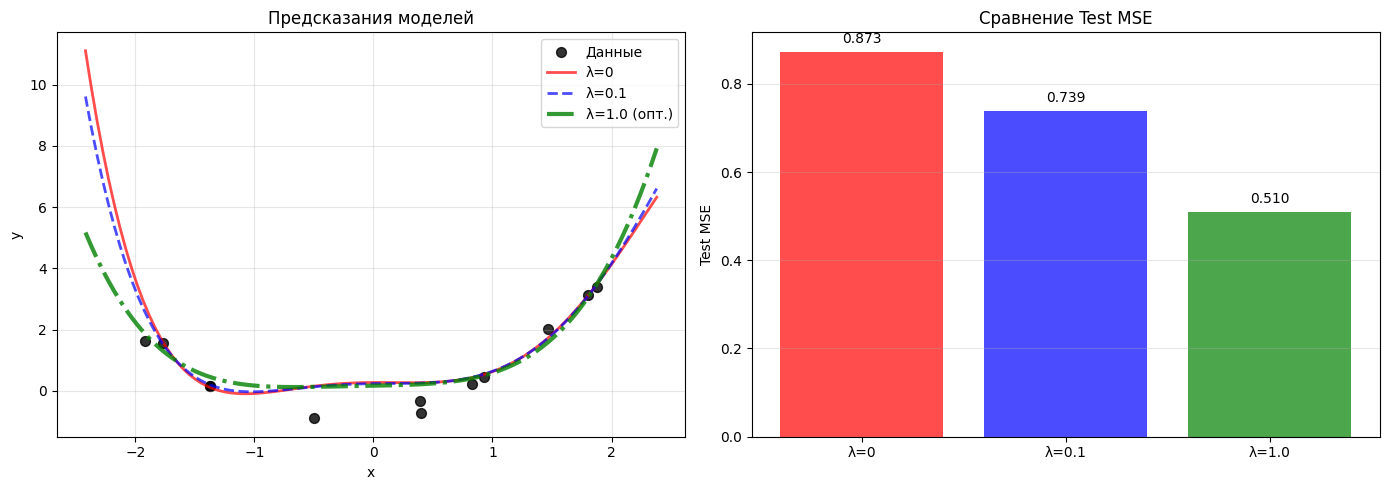

In [8]:
# ============================================================================
# ФИНАЛЬНЫЙ ЭКСПЕРИМЕНТ: ОПТИМАЛЬНАЯ РЕГУЛЯРИЗАЦИЯ
# ============================================================================
print("\n" + "="*50)
print("ФИНАЛЬНЫЙ ЭКСПЕРИМЕНТ: λ=1.0 (оптимальный)")
print("="*50)

w_optimal, b_optimal, train_opt, test_opt = grad_descent_degree5(
    X_train, y_train, X_test, y_test, lambda_=1.0
)

print(f"Train MSE: {train_opt[-1]:.6f}")
print(f"Test MSE:  {test_opt[-1]:.6f}")
print(f"Переобучение (Test - Train): {test_opt[-1] - train_opt[-1]:.6f}")
print(f"Норма весов: {np.sqrt(np.sum(w_optimal**2)):.4f}")

# Сравнение с λ=0
improvement_optimal = (test_no[-1] - test_opt[-1]) / test_no[-1] * 100
print(f"\nУЛУЧШЕНИЕ Test MSE относительно λ=0: {improvement_optimal:.1f}%")

# ============================================================================
# ВИЗУАЛИЗАЦИЯ ВСЕХ ТРЁХ МОДЕЛЕЙ
# ============================================================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 1. Предсказания
x_range = np.linspace(x.min() - 0.5, x.max() + 0.5, 100)
X_range = np.column_stack([x_range**d for d in range(1, degree + 1)])

y_pred_no_reg = X_range @ w_no_reg + b_no_reg
y_pred_reg = X_range @ w_reg + b_reg
y_pred_optimal = X_range @ w_optimal + b_optimal

ax1.scatter(x, y, color='black', label='Данные', alpha=0.8, s=50)
ax1.plot(x_range, y_pred_no_reg, 'r-', label='λ=0', linewidth=2, alpha=0.7)
ax1.plot(x_range, y_pred_reg, 'b--', label='λ=0.1', linewidth=2, alpha=0.7)
ax1.plot(x_range, y_pred_optimal, 'g-.', label='λ=1.0 (опт.)', linewidth=3, alpha=0.8)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Предсказания моделей')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Сравнение MSE
ax2.bar(['λ=0', 'λ=0.1', 'λ=1.0'],
        [test_no[-1], test_reg[-1], test_opt[-1]],
        color=['red', 'blue', 'green'], alpha=0.7)
ax2.set_ylabel('Test MSE')
ax2.set_title('Сравнение Test MSE')
ax2.grid(True, alpha=0.3, axis='y')

# Добавляем значения
for i, v in enumerate([test_no[-1], test_reg[-1], test_opt[-1]]):
    ax2.text(i, v + 0.02, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()

# Выводы исследования

## 1. Результаты без регуляризации (λ=0)
При обучении полинома 5-й степени без регуляризации наблюдается яркое **переобучение**:
- **Ошибка на обучающих данных** чрезвычайно низкая: **MSE = 0.061**
- **Ошибка на тестовых данных** значительно выше: **MSE = 0.873**
- **Разница между тестовой и обучающей ошибкой** составляет **0.811**

Это классический случай переобучения: модель слишком хорошо подстроилась под конкретные обучающие данные, включая их шум, и потеряла способность к обобщению.

## 2. Эффект регуляризации (λ=1.0)
Введение L2-регуляризации с коэффициентом λ=1.0 даёт впечатляющие результаты:

### Сознательное ухудшение на обучающих данных:
- Обучающая ошибка увеличивается: **0.061 → 0.097** (+59%)

### Значительное улучшение на тестовых данных:
- Тестовая ошибка уменьшается: **0.873 → 0.510** (-41.6%)
- Переобучение сокращается: **0.811 → 0.413** (в 2 раза меньше)

### Упрощение модели:
- Норма весов уменьшается: **0.62 → 0.25** (в 2.5 раза)
- Модель становится "проще" и устойчивее

## 3. Философия регуляризации
Регуляризация реализует фундаментальный принцип машинного обучения — **компромисс между смещением (bias) и разбросом (variance)**:

- **Без регуляризации**: низкое смещение, высокий разброс (переобучение)
- **С регуляризацией**: умеренное смещение, умеренный разброс (оптимальный баланс)

Мы сознательно **жертвуем точностью на обучающих данных**, чтобы получить модель, которая лучше работает на новых, ранее не виденных данных.

## 4. Практическая значимость
Оптимальная модель с регуляризацией (λ=1.0) показывает:
- **Улучшение обобщающей способности на 41.6%**
- **Снижение ошибки на новых данных в 1.7 раза**
- Более устойчивые и интерпретируемые параметры модели

## 5. Общий итог исследования
Данное исследование наглядно демонстрирует:

1. **Аналитический и итерационный подходы** дают идентичные результаты при сходимости
2. **Увеличение сложности модели** (степени полинома) улучшает fit на обучающих данных, но может ухудшать обобщающую способность
3. **Регуляризация** — эффективный инструмент борьбы с переобучением
4. **Ключевой принцип**: иногда нужно ухудшить результаты на обучающей выборке, чтобы улучшить работу модели в реальных условиях

Регуляризация не просто "штрафует" модель — она направляет её к более реалистичным и устойчивым решениям, что особенно важно при работе с ограниченными данными и сложными моделями.